In [1]:
import tensorflow as tf
import tensorflow.keras.datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train_raw, y_train_raw),(x_test_raw, y_test_raw) = tfds.mnist.load_data()

In [3]:
print(f'panjang x train: {len(x_train_raw)}',
f'panjang y train: {len(y_train_raw)}',
f'panjang x test: {len(x_test_raw)}',
f'panjang y test: {len(y_test_raw)}',
sep='\n'
)

panjang x train: 60000
panjang y train: 60000
panjang x test: 10000
panjang y test: 10000


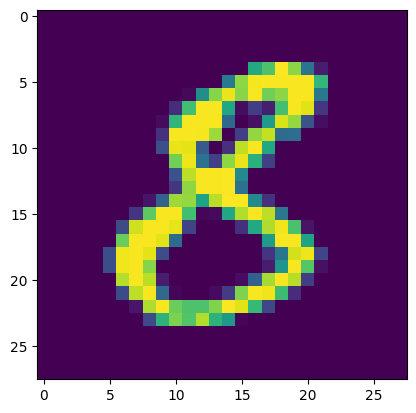

In [4]:
plt.imshow(x_test_raw[1234])

In [5]:
num_class = len(np.unique(y_train_raw))
y_train = tf.keras.utils.to_categorical(y_train_raw, num_class)
y_test = tf.keras.utils.to_categorical(y_test_raw, num_class)

In [6]:
x_train_raw.shape

(60000, 28, 28)

In [7]:
x_train = tf.reshape(x_train_raw,[60000, 784])
x_test = tf.reshape(x_test_raw,[10000, 784])

In [8]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

In [9]:
x_train = tf.cast(x_train, tf.float32)/255
x_test = tf.cast(x_test, tf.float32)/255

In [27]:
#arsitektur
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_dim = 784),#layer
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(), #adam(learning_rate=1e-4)
    loss = tf.keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
)

In [29]:
# training
history = model.fit(
    x_train, y_train,
    epochs = 25, 
    steps_per_epoch = 5,
    verbose = 2 ,#tanpa animasi
    validation_data=(x_test, y_test)
)

Epoch 1/25
5/5 - 1s - loss: 2.2437 - accuracy: 0.1819 - val_loss: 2.1376 - val_accuracy: 0.3083 - 914ms/epoch - 183ms/step
Epoch 2/25
5/5 - 0s - loss: 2.0727 - accuracy: 0.3575 - val_loss: 1.9608 - val_accuracy: 0.4270 - 376ms/epoch - 75ms/step
Epoch 3/25
5/5 - 0s - loss: 1.8849 - accuracy: 0.4815 - val_loss: 1.7520 - val_accuracy: 0.5738 - 376ms/epoch - 75ms/step
Epoch 4/25
5/5 - 0s - loss: 1.6694 - accuracy: 0.6077 - val_loss: 1.5297 - val_accuracy: 0.6490 - 433ms/epoch - 87ms/step
Epoch 5/25
5/5 - 0s - loss: 1.4491 - accuracy: 0.6636 - val_loss: 1.3066 - val_accuracy: 0.6893 - 419ms/epoch - 84ms/step
Epoch 6/25
5/5 - 0s - loss: 1.2339 - accuracy: 0.7058 - val_loss: 1.0981 - val_accuracy: 0.7418 - 405ms/epoch - 81ms/step
Epoch 7/25
5/5 - 0s - loss: 1.0408 - accuracy: 0.7545 - val_loss: 0.9210 - val_accuracy: 0.7876 - 405ms/epoch - 81ms/step
Epoch 8/25
5/5 - 0s - loss: 0.8786 - accuracy: 0.7926 - val_loss: 0.7760 - val_accuracy: 0.8183 - 369ms/epoch - 74ms/step
Epoch 9/25
5/5 - 0s - l

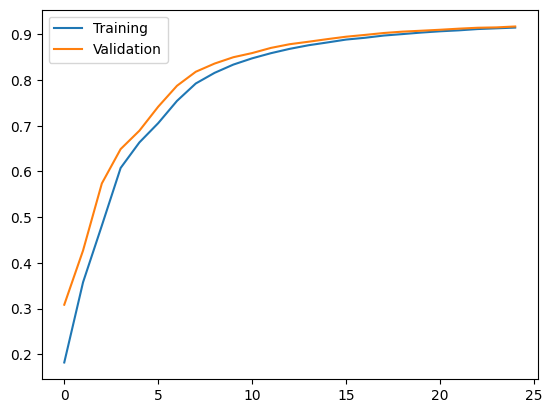

In [30]:
nilai_x = range(len(history.history['accuracy']))
plt.plot(nilai_x, history.history['accuracy'], label='Training')
plt.plot(nilai_x, history.history['val_accuracy'], label='Validation')
plt.legend()
plt.show()

In [31]:
model.save('model/model.h5')

In [33]:
model_saved = tf.keras.models.load_model('model\model.h5')
model_saved.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_saved.evaluate(x_test, y_test,batch_size=31)

323/323 [==============================] - 0s 730us/step - loss: 0.2932 - accuracy: 0.9174


[0.2931561768054962, 0.9174000024795532]

In [50]:
hasil = model_saved.predict(x_test)

313/313 [==============================] - 0s 662us/step


In [51]:
hasil

array([[3.4294059e-04, 6.8487464e-07, 3.0026076e-04, ..., 9.9644119e-01,
        5.3144588e-05, 1.7238375e-03],
       [4.6211956e-03, 2.9021161e-05, 9.1853380e-01, ..., 1.6321181e-05,
        2.3951926e-03, 6.6647175e-07],
       [7.1827532e-04, 9.4996673e-01, 9.2138750e-03, ..., 7.1027423e-03,
        1.7392669e-02, 2.5505004e-03],
       ...,
       [7.6052884e-06, 3.3458975e-06, 1.3885637e-04, ..., 7.1724365e-04,
        7.9350304e-03, 4.8033983e-02],
       [1.7787218e-03, 1.5988418e-04, 9.7043579e-05, ..., 8.3619907e-06,
        1.9823538e-01, 2.2637862e-04],
       [3.8400041e-05, 5.3754170e-09, 2.8142458e-04, ..., 7.5503408e-08,
        7.7481928e-07, 4.0851802e-07]], dtype=float32)

In [52]:
x_train.shape

TensorShape([60000, 784])

In [46]:
np.unique(y_train_raw)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [40]:
hasil.shape

(60000, 10)

In [45]:
tf.argmax(hasil[2]).numpy()

4

In [54]:
hasil[22]

array([1.0998878e-03, 3.1733795e-03, 3.0571720e-02, 1.1886947e-03,
       2.8993869e-01, 7.3491974e-05, 6.5604937e-01, 7.5021209e-03,
       8.8598179e-03, 1.5428574e-03], dtype=float32)

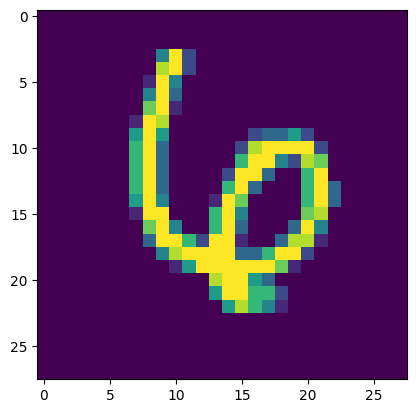

In [53]:
plt.imshow(x_test_raw[22])